Ensures all the required libraries are installed through pip3

In [1]:
!pip install scikit-learn
!pip install seaborn
!pip install numpy
!pip install pandas

Imports all the installed libraries with shortened names for ease of programming 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Reads the correct csv file for anaysis from the save location, which in this case is the same as where this file is located 

In [3]:
df=pd.read_csv('BankChurners.csv')

Shows the 'head' of the data frame, 5 rows. This is to make sure the file has been imported correctly  

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Then I remove the two end columns as I don't believe them to be relavent and may cause confusion were I to perform machine learning on the data frame 

In [5]:
df.drop(df.columns[[-1, -2]], axis=1, inplace=True)

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


I then create a correlation matrix for the data, showing relation between columns in a float format (-1-0-1)
And relate the information in a heatmap

/var/folders/x8/qx6x5f0n0lb6vcfcn1p9n9ch0000gn/T/ipykernel_1075/321237534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


                          CLIENTNUM  Customer_Age  Dependent_count  \
CLIENTNUM                  1.000000      0.007613         0.006772   
Customer_Age               0.007613      1.000000        -0.122254   
Dependent_count            0.006772     -0.122254         1.000000   
Months_on_book             0.134588      0.788912        -0.103062   
Total_Relationship_Count   0.006907     -0.010931        -0.039076   
Months_Inactive_12_mon     0.005729      0.054361        -0.010768   
Contacts_Count_12_mon      0.005694     -0.018452        -0.040505   
Credit_Limit               0.005708      0.002476         0.068065   
Total_Revolving_Bal        0.000825      0.014780        -0.002688   
Avg_Open_To_Buy            0.005633      0.001151         0.068291   
Total_Amt_Chng_Q4_Q1       0.017369     -0.062042        -0.035439   
Total_Trans_Amt           -0.019692     -0.046446         0.025046   
Total_Trans_Ct            -0.002961     -0.067097         0.049912   
Total_Ct_Chng_Q4_Q1 

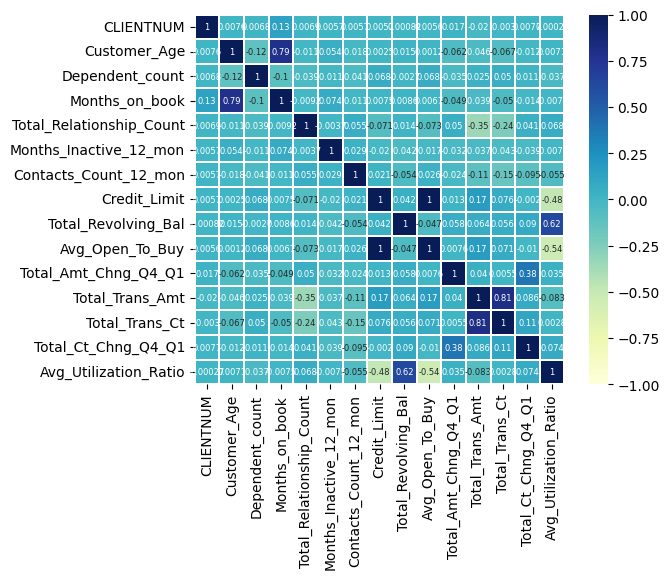

In [7]:
corr_matrix = df.corr()
print(corr_matrix)

sb.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, cmap="YlGnBu", linewidths=0.1, annot=True, annot_kws={"fontsize":6} )
plt.show()

This next part creates a line plot showing the linear correlation between a customers age and how long they have been on the books, 
showing a positive linear trend 

<AxesSubplot: xlabel='Customer_Age', ylabel='Months_on_book'>

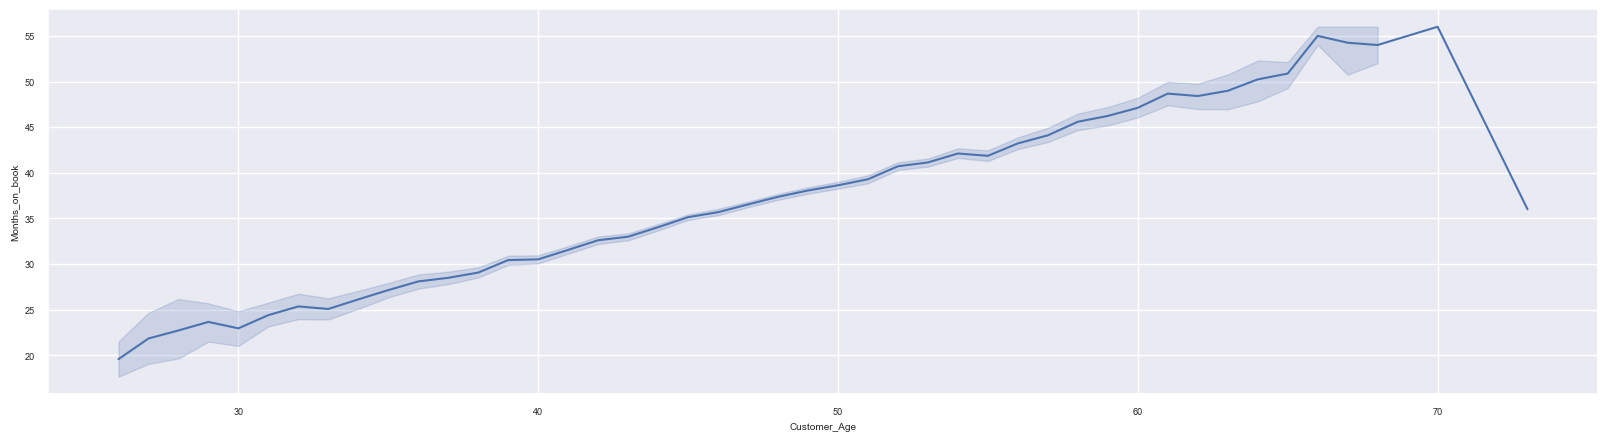

In [10]:
sb.set(font_scale=0.6)
plt.figure(figsize=(20, 5))
sb.lineplot(df, x="Customer_Age", y="Months_on_book")